In [1]:
import pandas as pd

import scripts.similarity_metrics as similarity_metrics
from scripts.similarity_metrics import NormalizationLevel

In [2]:
def apply_similarity_metrics(data_df: pd.DataFrame):
    df = data_df.copy()
    df.drop(columns=["ref_normalized", "hyp_normalized", "wer", "cer", "sequence_similarity", "ref_word_count",
                     "hyp_word_count"], inplace=True, errors="ignore")
    df.rename(columns={"predicted_sentence": "text_spt"}, inplace=True, errors="ignore")

    # Apply similarity metrics to each row
    metrics = df.apply(
        lambda row: similarity_metrics.calculate(
            reference=row["text_original"],
            hypothesis=row["text_spt"],
            normalization_level=NormalizationLevel.LIGHT),
        axis=1
    )

    # Convert list of dicts → DataFrame
    metrics_df = pd.DataFrame(metrics.tolist())

    metrics_df.index = df.index

    # Merge metric columns back into main DataFrame and save
    df = pd.concat([df, metrics_df], axis=1).sort_values("wer", ascending=False)
    return df

In [3]:
usc_df = pd.read_csv("uzbek-speech-corpus__case_insensitive.csv", index_col="id")
usc_df = apply_similarity_metrics(usc_df)
usc_df.to_csv("uzbek-speech-corpus__case_insensitive.csv", index_label="id")
usc_df

,speaker_id,path,duration,word_count,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
2,352830655,352830655_1_80046_1.wav,6.1600,6,train,o'zbekiston sanitariya epidemiologik osoyishta...,O'zbekiston sanitariya epidemiologik osoyishta...,o'zbekiston sanitariya epidemiologik osoyishta...,o'zbekiston sanitariya epidemiologik osoyishta...,0.0,0.0,1.0,6,6
12,352830655,352830655_1_87633_1.wav,5.2800,6,train,shuningdek sog'liqni saqlash vazirligi koronav...,"Shuningdek, sog'liqni saqlash vazirligi korona...",shuningdek sog'liqni saqlash vazirligi koronav...,shuningdek sog'liqni saqlash vazirligi koronav...,0.0,0.0,1.0,6,6
19,352830655,352830655_1_87674_1.wav,5.0000,4,train,o'zbek paxtasini boykot qilgan,O'zbek paxtasini boykot qilgan.,o'zbek paxtasini boykot qilgan,o'zbek paxtasini boykot qilgan,0.0,0.0,1.0,4,4
21,352830655,352830655_1_87679_1.wav,5.5600,5,train,ayni paytda energoblok ta'mirga chiqarilgan,Ayni paytda energoblok ta'mirga chiqarilgan.,ayni paytda energoblok ta'mirga chiqarilgan,ayni paytda energoblok ta'mirga chiqarilgan,0.0,0.0,1.0,5,5
24,352830655,352830655_1_87720_1.wav,5.4000,7,train,ekologik sertifikatlash organi tomonidan mazku...,Ekologik sertifikatlash organi tomonidan mazku...,ekologik sertifikatlash organi tomonidan mazku...,ekologik sertifikatlash organi tomonidan mazku...,0.0,0.0,1.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,1218456233,1218456233_1_2834_2.wav,5.8200,13,train,o'shanda bu ishning oqibati nima bilan tugashi...,O'shanda bu ishning oqibati nima bilan tugashi...,o'shanda bu ishning oqibati nima bilan tugashi...,o'shanda bu ishning oqibati nima bilan tugashi...,0.0,0.0,1.0,13,13
17326,1218456233,1218456233_1_2857_2.wav,5.4305,9,train,aytishgan bilan aytishib so'kishgan bilan so'k...,"Aytishgan bilan aytishib, so'kishgan bilan so'...",aytishgan bilan aytishib so'kishgan bilan so'k...,aytishgan bilan aytishib so'kishgan bilan so'k...,0.0,0.0,1.0,9,9
17328,1218456233,1218456233_1_2894_2.wav,3.9000,7,train,nazarimda oyim uni bir so'zligini bilar edi,Nazarimda oyim uni bir so'zligini bilar edi.,nazarimda oyim uni bir so'zligini bilar edi,nazarimda oyim uni bir so'zligini bilar edi,0.0,0.0,1.0,7,7


In [3]:
feruza_speech_df = pd.read_csv("feruza_speech.csv", index_col="id")
feruza_speech_df.drop(columns=["text_cyrillic"], inplace=True)
feruza_speech_df.rename(columns={"text_latin": "text_original"}, inplace=True)

# Reorder text_original column to be one before the last column
cols = list(feruza_speech_df.columns)
cols.remove("text_original")
cols.insert(3, "text_original")
feruza_speech_df = feruza_speech_df[cols]

feruza_speech_df = apply_similarity_metrics(feruza_speech_df)
feruza_speech_df

,path,type,duration,text_original,text_spt,word_count,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,
1880,026-01.wav,validation,3.380000,"B..., 19-mart.",B 19-mart,3,"B..., 19-mart.",B 19-mart,1.0000,0.3571,0.7826,2,2
1997,029-92.wav,validation,5.500063,"CH..., 1-may.",Ch 1-may,3,"CH..., 1-may.",Ch 1-may,1.0000,0.4615,0.6667,2,2
1967,029-105.wav,validation,18.548500,"— Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'l...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",22,"Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'lsi...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",0.5714,0.2264,0.8483,21,19
369,1059-77.wav,train,5.367563,Aloqador mavzular:,aloqador mavzular,2,Aloqador mavzular:,Aloqador mavzular,0.5000,0.0556,0.9714,2,2
809,1048-17.wav,train,5.021000,"Mahmud Isayev,",Mahmud Isayev,2,"Mahmud Isayev,",Mahmud Isayev,0.5000,0.0714,0.9630,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,1065-82.wav,train,17.290063,Hayotligi vaqtida markaziy telekanallardan che...,Hayotligi vaqtida markaziy telekanallardan che...,20,Hayotligi vaqtida markaziy telekanallardan che...,Hayotligi vaqtida markaziy telekanallardan che...,0.0000,0.0000,1.0000,20,20
691,1010-46.wav,train,18.671250,Panamada joylashgan Mossack Fonseca shirkatiga...,Panamada joylashgan Mossack Fonseca shirkatiga...,22,Panamada joylashgan Mossack Fonseca shirkatiga...,Panamada joylashgan Mossack Fonseca shirkatiga...,0.0000,0.0000,1.0000,22,22
695,1040-55.wav,train,16.482750,Amerikadagi nasroniy ruhoniysi o'z tarafdorlar...,Amerikadagi nasroniy ruhoniysi o'z tarafdorlar...,18,Amerikadagi nasroniy ruhoniysi o'z tarafdorlar...,Amerikadagi nasroniy ruhoniysi o'z tarafdorlar...,0.0000,0.0000,1.0000,17,17


In [4]:
mask = feruza_speech_df["wer"] > 0.0
total_duration_affected = feruza_speech_df[mask]["duration"].sum() / 3600
total_duration = feruza_speech_df["duration"].sum() / 3600

feruza_speech_df.loc[mask, "ref_normalized"] = feruza_speech_df.loc[mask, "hyp_normalized"]
feruza_speech_df.loc[mask, "wer"] = 0.0
feruza_speech_df.loc[mask, "cer"] = 0.0
feruza_speech_df.loc[mask, "sequence_similarity"] = 1.0
feruza_speech_df.loc[mask, "ref_word_count"] = feruza_speech_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
feruza_speech_df.to_csv("feruza_speech_modified.csv", index_label="id")

Total duration affected: 2.44 hours (out of 4.39 hours)


In [5]:
common_voice_df = pd.read_csv("common_voice.csv", index_col="id")
common_voice_df.drop(columns={"speaker_trust_score"}, inplace=True)
common_voice_df.rename(
    columns={"sentence": "text_original", "predicted_sentence": "text_spt", "client_id": "speaker_id"},
    inplace=True
)

# Rename dataset type: dev -> validation
common_voice_df["type"] = common_voice_df["type"].replace("dev", "validation")

# Reorder text_original column to be one before the last column
cols = list(common_voice_df.columns)
cols.remove("text_original")
cols.insert(10, "text_original")
cols.remove("text_spt")
cols.insert(11, "text_spt")
cols.remove("speaker_id")
cols.insert(1, "speaker_id")
common_voice_df = common_voice_df[cols]

common_voice_df["path"] = common_voice_df["path"].str.replace(r".mp3$", ".wav", regex=True)

common_voice_df = apply_similarity_metrics(common_voice_df)
common_voice_df

,path,speaker_id,sentence_id,up_votes,down_votes,age,gender,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,
7287,common_voice_uz_29044982.wav,6b8ce9047728aad5f87de361b457a2176017067cacaae0...,ea199c4b0cfb18ba9cd9d37006026a66c1b54428423be0...,2,0,NaN,NaN,train,4.320,3,Tag'in... O'ng burildi...,Tag'in o'ng burildi.,Tag'in... O'ng burildi...,Tag'in o'ng burildi.,1.0,0.2400,0.8444,3,3
6526,common_voice_uz_28894630.wav,72f41c6b4733d93836e0def2d211362ac6db2632ea326a...,b353ac590bcd763f95225d405a6b7451a571a53eff16b9...,2,0,teens,female_feminine,train,3.780,3,O'n yettinchi asr.,17-asr,O'n yettinchi asr.,17-asr,1.0,0.8333,0.2500,3,1
5145,common_voice_uz_29771945.wav,65701bd746d41eb89b41eeac8caeb46055c868dafda4d8...,607d988fb82cb3827f5413756cdfad582e5f66145fe46a...,2,0,NaN,NaN,test,4.320,2,"Kelajagi, davomi.",kelajagi davomi,"Kelajagi, davomi.",Kelajagi davomi,1.0,0.1176,0.9375,2,2
5399,common_voice_uz_29470544.wav,1d5ee64db7f4d92f3326f18f4844d39472e8a04a7047a3...,2a07ebf11924e63c2d1feec53a9a4ff64d51eab3f94fce...,2,0,NaN,NaN,test,3.730,2,Yasholmayman onajonimsiz,"Yasholmayman, onajonimsiz.",Yasholmayman onajonimsiz,"Yasholmayman, onajonimsiz.",1.0,0.0833,0.9600,2,2
6553,common_voice_uz_29492915.wav,aa6ecc7fd43b0bd12a2ef4265a218102d3c964d4c19e96...,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,2,0,NaN,NaN,test,3.420,2,"Ayniqsa, oyimni",Ayniqsa oyimni.,"Ayniqsa, oyimni",Ayniqsa oyimni.,1.0,0.1333,0.9333,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,common_voice_uz_27266456.wav,44c15c0f726ba78cb2a2f545eebe60e36e997c805e44d1...,159880c9a521f9303a93166d6da4337d1003ac215640d6...,2,0,NaN,NaN,train,6.660,10,Bugungi o'zbek tilidagi tarixan o'zakdosh so'z...,Bugungi o'zbek tilidagi tarixan o'zakdosh so'z...,Bugungi o'zbek tilidagi tarixan o'zakdosh so'z...,Bugungi o'zbek tilidagi tarixan o'zakdosh so'z...,0.0,0.0000,1.0000,10,10
5098,common_voice_uz_27266485.wav,44c15c0f726ba78cb2a2f545eebe60e36e997c805e44d1...,1e5e56d722fed8627b6f5750690715b0ecca94dddab9ff...,2,0,NaN,NaN,train,6.408,10,Ya'ni noqonuniy yo'l bilan topilgan mablag'lar...,Ya'ni noqonuniy yo'l bilan topilgan mablag'lar...,Ya'ni noqonuniy yo'l bilan topilgan mablag'lar...,Ya'ni noqonuniy yo'l bilan topilgan mablag'lar...,0.0,0.0000,1.0000,10,10
5099,common_voice_uz_29006327.wav,d11bd3acba1fceb1334420a5d38a282c682275960abc5f...,7c83101e5cf728ec2727659ef4eaec3d22ee7b11097ec9...,2,0,teens,female_feminine,train,3.600,4,Aybsizligim bir o'limga teng.,Aybsizligim bir o'limga teng.,Aybsizligim bir o'limga teng.,Aybsizligim bir o'limga teng.,0.0,0.0000,1.0000,4,4


In [6]:
mask = common_voice_df["wer"] > 0.0
total_duration_affected = common_voice_df[mask]["duration"].sum() / 3600
total_duration = common_voice_df["duration"].sum() / 3600

common_voice_df.loc[mask, "ref_normalized"] = common_voice_df.loc[mask, "hyp_normalized"]
common_voice_df.loc[mask, "wer"] = 0.0
common_voice_df.loc[mask, "cer"] = 0.0
common_voice_df.loc[mask, "sequence_similarity"] = 1.0
common_voice_df.loc[mask, "ref_word_count"] = common_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
common_voice_df.to_csv("common_voice_modified.csv", index_label="id")

Total duration affected: 7.60 hours (out of 13.70 hours)


In [7]:
uzbek_voice_df = pd.read_csv("uzbek_voice.csv", index_col="id")

uzbek_voice_df.drop(columns={"net_votes"}, inplace=True)

uzbek_voice_df

,speaker_id,path,type,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,,
0,ad974593-4363-49c7-868b-24170166bdbf,37.wav,test,NaN,13,0,0,NaN,Unknown,9.576,17,"Agar biz chiqarayotgan qaror noto‘g‘ri bo‘lsa,...","Agar biz chiqarayotgan qaror noto‘g‘ri bo‘lsa,...",agar biz chiqarayotgan qaror noto'g'ri bo'lsa ...,agar biz chiqarayotgan qaror noto'g'ri bo'lsa ...,0.0,0.0,1.0,17,17
4,38486d7f-0cdc-43d8-8c04-bcdbf525bbd6,44.wav,train,NaN,16,0,0,NaN,Unknown,6.228,11,O‘zbekistondagi oliy va o‘rta maxsus islom bil...,O‘zbekistondagi oliy va o‘rta maxsus islom bil...,o'zbekistondagi oliy va o'rta maxsus islom bil...,o'zbekistondagi oliy va o'rta maxsus islom bil...,0.0,0.0,1.0,11,11
5,38486d7f-0cdc-43d8-8c04-bcdbf525bbd6,46.wav,train,NaN,7,0,0,NaN,Unknown,8.028,15,“Bu Qatar va O‘zbekiston ushbu mushkul davrda ...,“Bu Qatar va O‘zbekiston ushbu mushkul davrda ...,bu qatar va o'zbekiston ushbu mushkul davrda b...,bu qatar va o'zbekiston ushbu mushkul davrda b...,0.0,0.0,1.0,15,15
10,d167468f-f3ab-4c21-8da9-b983afe9311b,58.wav,validation,Farg'ona,5,0,0,18-24,male_masculine,6.480,3,"Albatta, u barakadir.","Albatta, u barakadir.",albatta u barakadir,albatta u barakadir,0.0,0.0,1.0,3,3
11,d167468f-f3ab-4c21-8da9-b983afe9311b,59.wav,validation,Farg'ona,2,0,0,18-24,male_masculine,6.264,3,O‘rtamizda muammo yo‘q”.,o'rtamizda muammo yo'q,o'rtamizda muammo yo'q,o'rtamizda muammo yo'q,0.0,0.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160063,1684927e-c0ee-4208-a6ea-ddc556296815,864857.wav,validation,Andijon,0,0,0,25-34,male_masculine,6.048,10,Yer islohoti kutilgan natija berishi uchun yan...,Yer islohoti kutilgan natija berishi uchun yan...,yer islohoti kutilgan natija berishi uchun yan...,yer islohoti kutilgan natija berishi uchun yan...,0.0,0.0,1.0,10,10
160064,1684927e-c0ee-4208-a6ea-ddc556296815,864861.wav,validation,Andijon,0,0,0,25-34,male_masculine,6.480,9,ba’zi kishilarga mazkur ochiq sudda ishtirok e...,Ba'zi kishilarga mazkur ochiq sudda ishtirok e...,ba'zi kishilarga mazkur ochiq sudda ishtirok e...,ba'zi kishilarga mazkur ochiq sudda ishtirok e...,0.0,0.0,1.0,9,9
160065,1684927e-c0ee-4208-a6ea-ddc556296815,864862.wav,validation,Andijon,0,0,0,25-34,male_masculine,8.568,11,Sud ibodatxonani buzish haqida qaror chiqardi....,Sud ibodatxonani buzish haqida qaror chiqardi....,sud ibodatxonani buzish haqida qaror chiqardi ...,sud ibodatxonani buzish haqida qaror chiqardi ...,0.0,0.0,1.0,11,11


In [8]:
# Example: O‘ylashimcha, hammasi yaxshilikka”, deydi Jaloliddinov.
trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)
matched = uzbek_voice_df[trailing_quote_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df["text_spt"] = uzbek_voice_df["text_spt"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)
uzbek_voice_df.loc[trailing_quote_mask, "text_original"] = uzbek_voice_df.loc[
    trailing_quote_mask, "text_original"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)

matched

/tmp/ipykernel_51595/1253041954.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
32,243.wav,"Bo‘lmasa, o‘zingni o‘yla”.","Bo‘lmasa, o‘zingni o‘yla”.",bo'lmasa o'zingni o'yla
85,721.wav,Shuning o‘zi yetarli”.,Shuning o‘zi yetarli”.,shuning o'zi yetarli
151,2367.wav,Bundan judayam xursandman”.,Bundan judayam xursandman”.,bundan judayam xursandman
3192,52636.wav,"Istalgan turdagi zo‘ravonlikka”, deydi Infantino.","Istalgan turdagi zo‘ravonlikka”, deydi Infantino.",istalgan turdagi zo'ravonlikka deydi infantino
3322,53711.wav,"O‘ylashimcha, hammasi yaxshilikka”, deydi Jalo...","O‘ylashimcha, hammasi yaxshilikka”, deydi Jalo...",o'ylashimcha hammasi yaxshilikka deydi jalolid...
...,...,...,...,...
100389,482680.wav,"Bozor talabini o‘rganib, aql bilan ish tutilsa...","Bozor talabini o‘rganib, aql bilan ish tutilsa...",bozor talabini o'rganib aql bilan ish tutilsa ...
102890,489291.wav,Hamma ishlar aholining roziligi olinmasdan qil...,Hamma ishlar aholining roziligi olinmasdan qil...,hamma ishlar aholining roziligi olinmasdan qil...
104142,493115.wav,"Aslida, o‘zbekchilikning zamirida beg‘ubor g‘o...","Aslida, o‘zbekchilikning zamirida beg‘ubor g‘o...",aslida o'zbekchilikning zamirida beg'ubor g'oy...


In [9]:
# Examples: 8 677 960, 971 483, 1 483
only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)
matched = uzbek_voice_df[only_numbers_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df.loc[only_numbers_mask, "text_spt"] = uzbek_voice_df.loc[only_numbers_mask, "text_original"]

uzbek_voice_df.to_csv("uzbek_voice_modified.csv", index_label="id")
matched

/tmp/ipykernel_51595/3492146412.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
157151,855102.wav,58 025,58025,ellik sakkiz ming yigirma besh
157152,855104.wav,118 275,118275,bir yuz o'n sakkiz ming ikki yuz yetmish besh
157153,855106.wav,623 261,623261,olti yuz yigirma uch ming ikki yuz oltmish bir
157211,855290.wav,547,547,besh yuz qirq yetti
157212,855291.wav,71 004,71004,yetmish bir ming to'rt
...,...,...,...,...
159245,862775.wav,78 950,78950,yetmish sakkiz ming to'qqiz yuz ellik
159328,863008.wav,61 619,61619,oltmish bir ming olti yuz o'n to'qqiz
159329,863009.wav,85 049,85049,sakson besh ming qirq to'qqiz


In [10]:
uzbek_voice_df = apply_similarity_metrics(uzbek_voice_df)
uzbek_voice_df

,speaker_id,path,type,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,,
29,14150e40-3efa-4aa4-a81e-9dfd9f892170,200.wav,train,Qashqadaryo,4,0,0,18-24,male_masculine,3.564,3,Birinchi bellashuv 1:0.,1-bellashuv 1:0,Birinchi bellashuv 1:0.,1-bellashuv 1:0,1.0,0.4348,0.6842,3,2
656,1cee4c62-e13d-4314-9c09-53eb75817f1e,14416.wav,test,Farg'ona,1,0,0,18-24,female_feminine,5.904,3,"“Sen uxlaganingda”, 1995-yil.",Sen uxlaganingda 1995-yil,"""Sen uxlaganingda"", 1995-yil.",Sen uxlaganingda 1995-yil,1.0,0.1379,0.9259,3,3
43379,75dd3571-3a3b-40e7-8ebd-0b68c2a9dda4,214280.wav,train,Samarqand,2,0,0,35-...,male_masculine,4.320,3,"Qudratimiz, shak-shubhasiz, odamlarda!",Qudratimiz shak-shubhasiz odamlarda.,"Qudratimiz, shak-shubhasiz, odamlarda!",Qudratimiz shak-shubhasiz odamlarda.,1.0,0.0789,0.9459,3,3
1082,acc03deb-aeeb-45f5-b704-5be5e2392a27,22788.wav,train,Navoiy,0,0,0,25-34,female_feminine,5.112,4,"Kimdan, nega qo‘rqdik, bilmadim.",Kimdan? Nega qo'rqdik? Bilmadim.,"Kimdan, nega qo'rqdik, bilmadim.",Kimdan? Nega qo'rqdik? Bilmadim.,1.0,0.1250,0.8750,4,4
95,423c0258-88cf-48d9-8861-3ef95ce23bd5,986.wav,train,Farg'ona,4,0,0,18-24,female_feminine,3.960,3,“Mening yoshim 28da.,Mening yoshim 28 da.,"""Mening yoshim 28da.",Mening yoshim 28 da.,1.0,0.1000,0.9500,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52081,332a5b03-584b-4c2d-ad62-3080b632a7d9,339032.wav,train,Qashqadaryo,0,0,0,18-24,female_feminine,6.084,9,O‘zbekistonliklar uchun AliExpress bepul jo‘na...,O'zbekistonliklar uchun AliExpress bepul jo'na...,O'zbekistonliklar uchun AliExpress bepul jo'na...,O'zbekistonliklar uchun AliExpress bepul jo'na...,0.0,0.0000,1.0000,8,8
52080,800943de-8992-460c-8f91-fa1d221eb9ec,339030.wav,train,Jizzax,0,0,0,40-49,male_masculine,6.012,8,Guvohlar ayolni plyajda ulkan to‘lqin oqizib k...,Guvohlar ayolni plyajda ulkan to'lqin oqizib k...,Guvohlar ayolni plyajda ulkan to'lqin oqizib k...,Guvohlar ayolni plyajda ulkan to'lqin oqizib k...,0.0,0.0000,1.0000,8,8
52075,332a5b03-584b-4c2d-ad62-3080b632a7d9,339021.wav,train,Qashqadaryo,2,0,0,18-24,female_feminine,5.004,8,Yog‘li yuzning holati ko‘pgina omillar ta’siri...,Yog'li yuzning holati ko'pgina omillar ta'siri...,Yog'li yuzning holati ko'pgina omillar ta'siri...,Yog'li yuzning holati ko'pgina omillar ta'siri...,0.0,0.0000,1.0000,8,8


In [11]:
mask = uzbek_voice_df["wer"] > 0.0
total_duration_affected = uzbek_voice_df[mask]["duration"].sum() / 3600
total_duration = uzbek_voice_df["duration"].sum() / 3600

uzbek_voice_df.loc[mask, "ref_normalized"] = uzbek_voice_df.loc[mask, "hyp_normalized"]
uzbek_voice_df.loc[mask, "wer"] = 0.0
uzbek_voice_df.loc[mask, "cer"] = 0.0
uzbek_voice_df.loc[mask, "sequence_similarity"] = 1.0
uzbek_voice_df.loc[mask, "ref_word_count"] = uzbek_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
uzbek_voice_df.to_csv("uzbek_voice_modified.csv", index_label="id")

Total duration affected: 37.72 hours (out of 152.35 hours)


In [12]:
news_df = pd.read_csv("news_dataset.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
news_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

news_df = apply_similarity_metrics(news_df)
news_df

,path,duration,type,char_count,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
1323,00010327.wav,9.861375,train,145.0,22.0,"3685 so'm, Saidullayev Akmal Yuldashevichdan 3...",son uch ming olti yuz sakson besh so'm. Saidul...,"3685 so'm, Saidullayev Akmal Yuldashevichdan 3...",Son uch ming olti yuz sakson besh so'm. Saidul...,2.1111,1.6230,0.4466,9,22
1318,00010302.wav,7.354687,train,92.0,14.0,Rahmatov Azimjon Qahramon o'g'lidan 54 544 000...,"soʻm, Rahmatov Azizjon Qahramon oʻgʻlidan elli...",Rahmatov Azimjon Qahramon o'g'lidan 54 544 000...,"So'm, Rahmatov Azizjon Qahramon o'g'lidan elli...",1.3750,0.9804,0.5874,8,14
1305,00010240.wav,13.610000,train,175.0,24.0,topshirilgan 47 362 000 so'm Yo'ldosheva Nargi...,tomondan topshirilgan qirq yetti million uch y...,Topshirilgan 47 362 000 so'm Yo'ldosheva Nargi...,Tomondan topshirilgan qirq yetti million uch y...,1.0625,0.6903,0.6736,16,24
1365,00010743.wav,6.170687,train,8.0,1.0,etmoqda,etmoqda.,Etmoqda,Etmoqda.,1.0000,0.1429,0.9333,1,1
970,00007823.wav,4.389312,train,12.0,1.0,ikkinchidan,"Ikkinchidan,",Ikkinchidan,"Ikkinchidan,",1.0000,0.0909,0.9565,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,00016543.wav,7.472000,train,94.0,15.0,O'tgan yili ham bu stresslar bor edi. Lekin o'...,o'tgan yili ham bu stresslar bor edi. Lekin o'...,O'tgan yili ham bu stresslar bor edi. Lekin o'...,O'tgan yili ham bu stresslar bor edi. Lekin o'...,0.0000,0.0000,1.0000,15,15
2072,00016504.wav,13.541375,train,163.0,22.0,"Demak, biz markazda turib qilayotgan har bitta...","Demak, biz markazda turib qilayotgan har bitta...","Demak, biz markazda turib qilayotgan har bitta...","Demak, biz markazda turib qilayotgan har bitta...",0.0000,0.0000,1.0000,22,22
2069,00016492.wav,11.237375,train,117.0,15.0,va xuddi shu hisob-kitoblar asosida O'zbekisto...,va xuddi shu hisob-kitoblar asosida Oʻzbekisto...,Va xuddi shu hisob-kitoblar asosida O'zbekisto...,Va xuddi shu hisob-kitoblar asosida O'zbekisto...,0.0000,0.0000,1.0000,15,15


In [13]:
mask = news_df["wer"] > 0.0
not_aligned_duration = news_df[mask]["duration"].sum() / 3600
total_duration = news_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
news_df.to_csv("news_dataset_modified.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 6.48 hours (out of 7.49 hours)


In [14]:
it_df = pd.read_csv("it_dataset.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
it_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

it_df = apply_similarity_metrics(it_df)
it_df

,path,duration,type,char_count,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
1381,09757.wav,7.304688,train,69.0,9.0,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
2145,16134.wav,17.946687,train,272.0,39.0,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",Bu start ikki ming yigirma ikkinchi yilgacha h...,0.6667,0.2965,0.2008,30,39
2418,17871.wav,7.322687,train,98.0,17.0,"yoki 500 000 dan kam emas, bir kunlik seminar ...","a-a, yoki 500 mingdan kam emas. Bir kunlik sem...","Yoki 500 000 dan kam emas, bir kunlik seminar ...","A-a, yoki 500 mingdan kam emas. Bir kunlik sem...",0.5625,0.2444,0.8085,16,17
2452,18079.wav,9.010000,validation,NaN,NaN,"Men detektiv Karterman, inglizchani tushunasan...",Men detektiv Karterman. Inglizchani tushunasan...,"Men detektiv Karterman, inglizchani tushunasan...",Men detektiv Karterman. Inglizchani tushunasan...,0.5455,0.0577,0.9474,11,11
406,03218.wav,17.946687,train,229.0,32.0,"Bu start 2022-yilgacha start qilamiz, Xudo xoh...","biz bu start 2022-yilgacha ham start qilamiz, ...","Bu start 2022-yilgacha start qilamiz, Xudo xoh...","Biz bu start 2022-yilgacha ham start qilamiz, ...",0.4667,0.0973,0.3429,30,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,01546.wav,12.000000,train,35.0,7.0,"Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.",0.0000,0.0000,1.0000,7,7
2433,17961.wav,14.842688,test,NaN,NaN,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,0.0000,0.0000,1.0000,33,33
2668,19329.wav,19.728000,test,NaN,NaN,"Men oʻylaymanki, bu qism tushunarli boʻldi. Al...","Men oʻylaymanki, bu qism tushunarli boʻldi. Al...","Men o'ylaymanki, bu qism tushunarli bo'ldi. Al...","Men o'ylaymanki, bu qism tushunarli bo'ldi. Al...",0.0000,0.0000,1.0000,42,42


In [15]:
mask = it_df["wer"] > 0.0
not_aligned_duration = it_df[mask]["duration"].sum() / 3600
total_duration = it_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
it_df.to_csv("it_dataset_modified.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 4.42 hours (out of 4.94 hours)


## Combine All Case Sensitive Datasets

In [19]:
feruza_speech_df = pd.read_csv("feruza_speech_modified.csv", index_col="id")
common_voice_df = pd.read_csv("common_voice_modified.csv", index_col="id")
uzbek_voice_df = pd.read_csv("uzbek_voice_modified.csv", index_col="id")
news_df = pd.read_csv("news_dataset_modified.csv", index_col="id")
it_df = pd.read_csv("it_dataset_modified.csv", index_col="id")

feruza_speech_df["dataset"] = "feruza_speech"
common_voice_df["dataset"] = "common_voice"
uzbek_voice_df["dataset"] = "uzbek_voice"
news_df["dataset"] = "news"
it_df["dataset"] = "it"

# Reorder dataset column
combined_case_sensitive_df = pd.concat(
    [feruza_speech_df, common_voice_df, uzbek_voice_df, news_df, it_df],
    axis=0,
    ignore_index=True
)
cols = list(combined_case_sensitive_df.columns)
cols.remove("dataset")
cols.insert(2, "dataset")
cols.remove("word_count")
cols.insert(-1, "word_count")
cols.remove("char_count")
combined_case_sensitive_df = combined_case_sensitive_df[cols]

combined_case_sensitive_df.to_csv("combined__case_sensitive.csv", index_label="id")
combined_case_sensitive_df

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,reported_count,word_count
0,026-01.wav,validation,feruza_speech,3.380000,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,029-92.wav,validation,feruza_speech,5.500063,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,029-105.wav,validation,feruza_speech,18.548500,"— Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'l...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",0.0,0.0,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3,1059-77.wav,train,feruza_speech,5.367563,Aloqador mavzular:,aloqador mavzular,Aloqador mavzular,Aloqador mavzular,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1048-17.wav,train,feruza_speech,5.021000,"Mahmud Isayev,",Mahmud Isayev,Mahmud Isayev,Mahmud Isayev,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110691,01546.wav,train,it,12.000000,"Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.","Yes. So yeah, it's cool. Thank you.",0.0,0.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
110692,17961.wav,test,it,14.842688,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,Dasturlashni olti-yetti yil oldin boshlagansiz...,0.0,0.0,...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110693,19329.wav,test,it,19.728000,"Men oʻylaymanki, bu qism tushunarli boʻldi. Al...","Men oʻylaymanki, bu qism tushunarli boʻldi. Al...","Men o'ylaymanki, bu qism tushunarli bo'ldi. Al...","Men o'ylaymanki, bu qism tushunarli bo'ldi. Al...",0.0,0.0,...,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110694,16962.wav,test,it,10.864062,shu intervyu olamiz degan. Chunki baribir anaq...,shu intervyu olamiz degan. Chunki baribir anaq...,Shu intervyu olamiz degan. Chunki baribir anaq...,Shu intervyu olamiz degan. Chunki baribir anaq...,0.0,0.0,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
combined_case_sensitive_df.describe(include="all")

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,reported_count,word_count
count,110696,110696,110696,110696.000000,110696,110696,110696,110696,110696.000000,110696.000000,...,110696.000000,106304,7631,106304.000000,106304.000000,102941,103971,97646,98673.000000,110118.000000
unique,110681,4,5,NaN,95245,96755,95767,95785,NaN,NaN,...,NaN,5742,6945,NaN,NaN,18,3,19,NaN,NaN
top,19898.wav,train,uzbek_voice,NaN,[musiqa],[musiqa],[musiqa],[musiqa],NaN,NaN,...,NaN,691f6092-2b2d-411e-a90b-192173ae5e02,134139c72b0d9fa416750526b99dd8f28dca366daa41f5...,NaN,NaN,18-24,female_feminine,Toshkent shahri,NaN,NaN
freq,2,89188,98673,NaN,66,29,66,65,NaN,NaN,...,NaN,952,4,NaN,NaN,63385,57356,13918,NaN,NaN
mean,NaN,NaN,NaN,5.947274,NaN,NaN,NaN,NaN,0.004056,0.001094,...,8.325369,NaN,NaN,0.944969,0.014844,NaN,NaN,NaN,0.007084,8.338219
std,NaN,NaN,NaN,2.098744,NaN,NaN,NaN,NaN,0.031548,0.011322,...,3.751618,NaN,NaN,1.987497,0.126407,NaN,NaN,NaN,0.086720,3.465534
min,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,5.112000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,7.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,7.000000
50%,NaN,NaN,NaN,5.508000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,8.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000
75%,NaN,NaN,NaN,6.228000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,9.000000,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,0.000000,9.000000


In [33]:
print(f"At least {combined_case_sensitive_df["speaker_id"].nunique():,} speakers involved\n")

print(f"Combined total duration: {combined_case_sensitive_df["duration"].sum() / 3600:.2f} hours\n")
print(combined_case_sensitive_df.groupby(["dataset", "type"])["duration"].sum() / 3600)
print()

print(combined_case_sensitive_df.groupby(["dataset", "gender"], dropna=False)["duration"].sum() / 3600)
print()

At least 5,742 speakers involved

Combined total duration: 182.87 hours

dataset        type      
common_voice   dev             1.328719
               test            2.751890
               train           9.617642
feruza_speech  test            0.399899
               train           3.568746
               validation      0.425895
it             test            0.496710
               train           3.950023
               validation      0.489044
news           test            0.794525
               train           6.156671
               validation      0.538155
uzbek_voice    test           13.565436
               train         124.184217
               validation     14.604499
Name: duration, dtype: float64

dataset        gender         
common_voice   female_feminine     1.663659
               male_masculine      8.050520
               NaN                 3.984071
feruza_speech  NaN                 4.394540
it             NaN                 4.935777
news           NaN

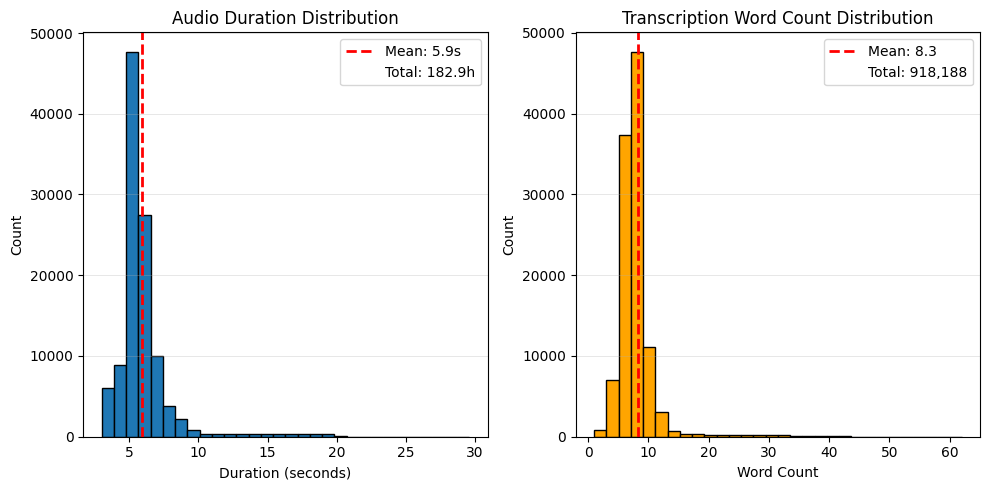

In [34]:
from scripts.dataset_plotting import plot_distribution_graphs

plot_distribution_graphs(combined_case_sensitive_df)

## Part 2

In [6]:
feruza_speech_df = pd.read_csv("feruza_speech_part2.csv", index_col="id")
feruza_speech_df.drop(columns=["text_cyrillic", "path"], inplace=True)
feruza_speech_df.rename(columns={"text_latin": "text_original", "path.1": "path"}, inplace=True)

# Reorder text_original column to be one before the last column
cols = ["path", "type", "duration", "word_count", "text_original", "text_spt"]
feruza_speech_df = feruza_speech_df[cols]

feruza_speech_df = apply_similarity_metrics(feruza_speech_df)
feruza_speech_df

,path,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,
362,029-92_augmented_pch_msk.wav,train,5.5001,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
361,029-92_augmented_spd_nse.wav,train,6.9566,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
360,029-92_augmented_spd_pch.wav,train,4.4474,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
231,026-01_augmented_nse_msk.wav,train,3.3800,3,"B..., 19-mart.",B 19-mart,"B..., 19-mart.",B 19-mart,1.0,0.3571,0.7826,2,2
230,026-01_augmented_pch_msk.wav,train,3.3800,3,"B..., 19-mart.",B 19-mart,"B..., 19-mart.",B 19-mart,1.0,0.3571,0.7826,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,024-100_augmented_spd_nse.wav,train,24.3619,25,"Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...",0.0,0.0000,1.0000,25,25
372,024-100_augmented_spd_pch.wav,train,22.0008,25,"Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...",0.0,0.0000,1.0000,25,25
371,021-64_augmented_nse_msk.wav,train,15.6000,21,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,0.0,0.0000,1.0000,21,21


In [7]:
mask = feruza_speech_df["wer"] > 0.0
total_duration_affected = feruza_speech_df[mask]["duration"].sum() / 3600
total_duration = feruza_speech_df["duration"].sum() / 3600

feruza_speech_df.loc[mask, "ref_normalized"] = feruza_speech_df.loc[mask, "hyp_normalized"]
feruza_speech_df.loc[mask, "wer"] = 0.0
feruza_speech_df.loc[mask, "cer"] = 0.0
feruza_speech_df.loc[mask, "sequence_similarity"] = 1.0
feruza_speech_df.loc[mask, "ref_word_count"] = feruza_speech_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
feruza_speech_df.to_csv("feruza_speech_modified_part2.csv", index_label="id")

Total duration affected: 2.23 hours (out of 3.22 hours)


In [9]:
common_voice_df = pd.read_csv("common_voice_part2.csv", index_col="id")
common_voice_df.drop(columns={"speaker_trust_score"}, inplace=True)
common_voice_df.rename(
    columns={"sentence": "text_original", "predicted_sentence": "text_spt", "client_id": "speaker_id"},
    inplace=True
)

# Rename dataset type: dev -> validation
common_voice_df["type"] = common_voice_df["type"].replace("dev", "validation")

# Reorder text_original column to be one before the last column
cols = list(common_voice_df.columns)
cols.remove("text_original")
cols.insert(10, "text_original")
cols.remove("text_spt")
cols.insert(11, "text_spt")
cols.remove("speaker_id")
cols.insert(1, "speaker_id")
common_voice_df = common_voice_df[cols]

common_voice_df["path"] = common_voice_df["path"].str.replace(r".mp3$", ".wav", regex=True)

common_voice_df = apply_similarity_metrics(common_voice_df)
common_voice_df

,path,speaker_id,sentence_id,up_votes,down_votes,age,gender,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,
7571,common_voice_uz_28892774.wav,633f4e362252d4c478e27f908b68480f89933e92839bb0...,a5356ceefe726034a0742413320f4c76f853b887750144...,2,0,twenties,male_masculine,train,3.456,2,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,1.0,0.0833,0.9362,2,2
6553,common_voice_uz_29492915.wav,aa6ecc7fd43b0bd12a2ef4265a218102d3c964d4c19e96...,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,2,0,NaN,NaN,test,3.420,2,"Ayniqsa, oyimni",Ayniqsa oyimni.,"Ayniqsa, oyimni",Ayniqsa oyimni.,1.0,0.1333,0.9333,2,2
6707,common_voice_uz_29659552.wav,c9ca42351a125d9d954efb587e6965622b120307845e4a...,4874e1acfcf4e5aa96de55672fc4dbcee42d1364523702...,2,0,teens,male_masculine,test,3.708,2,O'rgatib oldingizmi,o'rgatib oldingizmi?,O'rgatib oldingizmi,o'rgatib oldingizmi?,1.0,0.1053,0.9231,2,2
5145,common_voice_uz_29771945.wav,65701bd746d41eb89b41eeac8caeb46055c868dafda4d8...,607d988fb82cb3827f5413756cdfad582e5f66145fe46a...,2,0,NaN,NaN,test,4.320,2,"Kelajagi, davomi.",kelajagi davomi,"Kelajagi, davomi.",kelajagi davomi,1.0,0.1765,0.8750,2,2
6526,common_voice_uz_28894630.wav,72f41c6b4733d93836e0def2d211362ac6db2632ea326a...,b353ac590bcd763f95225d405a6b7451a571a53eff16b9...,2,0,teens,female_feminine,train,3.780,3,O'n yettinchi asr.,17-asr,O'n yettinchi asr.,17-asr,1.0,0.8333,0.2500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,common_voice_uz_28828269.wav,bd299afdd61c7e10f6352a24b16206e2e97339a36777a3...,3634596e8202fc0729249ecb56d5f78fd635da7b704e5f...,2,0,teens,male_masculine,test,5.148,5,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,0.0,0.0000,1.0000,5,5
4634,common_voice_uz_28903020.wav,cbe9f3a0053bef07470f5179a26f992986f75403738e79...,7e90a30314927ba70b5b4cc227a10c642f33c6fb2c70ec...,2,0,NaN,NaN,test,4.940,5,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,0.0,0.0000,1.0000,5,5
1913,common_voice_uz_30657618.wav,793fe0ce43a754a201704b36515c39acc4c902366c6dde...,0fed99a28f21ba7d1a4ed8d947163f51e2f04341fe9d5e...,0,0,twenties,male_masculine,train,6.050,8,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,0.0,0.0000,1.0000,8,8


In [10]:
mask = common_voice_df["wer"] > 0.0
total_duration_affected = common_voice_df[mask]["duration"].sum() / 3600
total_duration = common_voice_df["duration"].sum() / 3600

common_voice_df.loc[mask, "ref_normalized"] = common_voice_df.loc[mask, "hyp_normalized"]
common_voice_df.loc[mask, "wer"] = 0.0
common_voice_df.loc[mask, "cer"] = 0.0
common_voice_df.loc[mask, "sequence_similarity"] = 1.0
common_voice_df.loc[mask, "ref_word_count"] = common_voice_df.loc[mask, "hyp_word_count"]

test_val_df = common_voice_df[common_voice_df["type"].isin(["test", "validation"])]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
test_val_df.to_csv("common_voice_modified_part2.csv", index_label="id")

Total duration affected: 7.83 hours (out of 13.70 hours)


In [26]:
uzbek_voice_df = pd.read_csv("uzbek_voice_part2.csv", index_col="id")

uzbek_voice_df.drop(columns={"net_votes"}, inplace=True)

uzbek_voice_df

,speaker_id,path,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count,type
id,,,,,,,,,,,,,,,,,,,,
0,76fe880f-728b-4e9e-9944-750edab0c026,51.wav,NaN,5,0,0,NaN,not_specified,4.8600,7,Muhokama qilingan masalalar yuzasidan mutasadd...,Muhokama qilingan masalalar yuzasidan mutasadd...,muhokama qilingan masalalar yuzasidan mutasadd...,muhokama qilingan masalalar yuzasidan mutasadd...,0.0,0.0,1.0,7,7,train
1,2291696a-a2cf-4d6d-84aa-7f3ad3190113,98.wav,Jizzax,4,0,0,18-24,male_masculine,3.0960,3,Mavzuga oid yangiliklar:,mavzuga oid yangiliklar,mavzuga oid yangiliklar,mavzuga oid yangiliklar,0.0,0.0,1.0,3,3,train
2,2291696a-a2cf-4d6d-84aa-7f3ad3190113,99.wav,Jizzax,3,0,0,18-24,male_masculine,3.3120,4,Bu qirg‘izlarni kuldirdi .,Bu qirg'izlarni kuldirdi.,bu qirg'izlarni kuldirdi,bu qirg'izlarni kuldirdi,0.0,0.0,1.0,3,3,train
3,eecc8201-90e7-4fe9-9875-0d0e15246047,114.wav,Toshkent shahri,5,0,0,50-59,female_feminine,3.1680,3,Buni Kremldagilar kutyapti.,Buni Kremldagilar kutyapti.,buni kremldagilar kutyapti,buni kremldagilar kutyapti,0.0,0.0,1.0,3,3,train
4,eecc8201-90e7-4fe9-9875-0d0e15246047,123.wav,Toshkent shahri,5,0,0,50-59,female_feminine,3.0960,3,Haqiqiy fransuzcha ekler.,haqiqiy fransuzcha ekler,haqiqiy fransuzcha ekler,haqiqiy fransuzcha ekler,0.0,0.0,1.0,3,3,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60291,870a8795-b032-4e12-8cbd-7c8533a9722e,339988_augmented_pch_msk.wav,Buxoro,0,0,0,18-24,male_masculine,5.1120,8,Gruziyada rossiyalik va isroillik alpinistlar ...,Gruziyada rossiyalik va isroillik alpinistlar ...,Gruziyada rossiyalik va isroillik alpinistlar ...,Gruziyada rossiyalik va isroillik alpinistlar ...,0.0,0.0,1.0,8,8,train
60292,870a8795-b032-4e12-8cbd-7c8533a9722e,339965_augmented_spd_nse.wav,Buxoro,0,0,0,18-24,male_masculine,5.2639,9,O‘zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,0.0,0.0,1.0,8,8,train
60293,870a8795-b032-4e12-8cbd-7c8533a9722e,339965_augmented_pch_msk.wav,Buxoro,0,0,0,18-24,male_masculine,5.4360,9,O‘zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,O'zbekistondan Rossiyaga mehnat muhojirlarini ...,0.0,0.0,1.0,8,8,train


In [27]:
# Example: O‘ylashimcha, hammasi yaxshilikka”, deydi Jaloliddinov.
trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)
matched = uzbek_voice_df[trailing_quote_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df["text_spt"] = uzbek_voice_df["text_spt"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)
uzbek_voice_df.loc[trailing_quote_mask, "text_original"] = uzbek_voice_df.loc[
    trailing_quote_mask, "text_original"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)

matched

/tmp/ipykernel_75563/1253041954.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,


In [28]:
# Examples: 8 677 960, 971 483, 1 483
only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)
matched = uzbek_voice_df[only_numbers_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df.loc[only_numbers_mask, "text_spt"] = uzbek_voice_df.loc[only_numbers_mask, "text_original"]

uzbek_voice_df.to_csv("uzbek_voice_modified_part2.csv", index_label="id")
matched

/tmp/ipykernel_75563/4023398073.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
37564,855105.wav,18 097,18097,o'n sakkiz ming to'qson yetti
37568,855388.wav,15 361,15361,o'n besh ming uch yuz oltmish bir
37569,855391.wav,60 773,60773,oltmish ming yetti yuz yetmish uch
37570,855392.wav,99 043,99043,to'qson to'qqiz ming qirq uch
37571,855395.wav,82 043,82043,sakson ikki ming qirq uch
...,...,...,...,...
57641,857779_augmented_pch_msk.wav,287 409,287 409,287 409
57642,857774_augmented_spd_nse.wav,5 329 097,5 329 097,5 329 097
57643,857774_augmented_pch_msk.wav,5 329 097,5 329 097,5 329 097


In [29]:
uzbek_voice_df = apply_similarity_metrics(uzbek_voice_df)

case_not_aligned_mask = uzbek_voice_df["wer"] > 0.0
uzbek_voice_df[case_not_aligned_mask][["text_original", "text_spt", "ref_normalized", "hyp_normalized"]]

,text_original,text_spt,ref_normalized,hyp_normalized
id,,,,
27,Manzil: Neft zavodi.,manzil neft zavodi,Manzil: Neft zavodi.,manzil neft zavodi
152,Fotogalereya: Yerdagi jannat.,fotogalereya yerdagi jannat,Fotogalereya: Yerdagi jannat.,fotogalereya yerdagi jannat
248,Fotogalereya: Ko‘rinmas otlar.,fotogalereya ko'rinmas otlar,Fotogalereya: Ko'rinmas otlar.,fotogalereya ko'rinmas otlar
254,“Aralash matolar”; 6.,aralash matolar 6,"""Aralash matolar""; 6.",aralash matolar 6
274,"“Arsenal”, futbol; 9.",Arsenal futbol 9,"""Arsenal"", futbol; 9.",Arsenal futbol 9
...,...,...,...,...
39191,Mustaqillik yillarida iqtisodiyotni rivojlanti...,Mustaqillik yillarida iqtisodiyotni rivojlanti...,Mustaqillik yillarida iqtisodiyotni rivojlanti...,Mustaqillik yillarida iqtisodiyotni rivojlanti...
43571,Chempionatda hech qanday xavf sezmayotgan Live...,"Chempionatda hech qanday xavf sezmayotgan ""Liv...",Chempionatda hech qanday xavf sezmayotgan Live...,"Chempionatda hech qanday xavf sezmayotgan ""Liv..."
36147,"Nafaqat spagetti, qotgan non va shirinliklar, ...","Nafaqat spagetti, qotgan non va shirinliklar, ...","Nafaqat spagetti, qotgan non va shirinliklar, ...","Nafaqat spagetti, qotgan non va shirinliklar, ..."


In [30]:
# Reorder type column
cols = list(uzbek_voice_df.columns)
cols.remove("type")
cols.insert(2, "type")
uzbek_voice_df = uzbek_voice_df[cols]

mask = uzbek_voice_df["wer"] > 0.0
total_duration_affected = uzbek_voice_df[mask]["duration"].sum() / 3600
total_duration = uzbek_voice_df["duration"].sum() / 3600

uzbek_voice_df.loc[mask, "ref_normalized"] = uzbek_voice_df.loc[mask, "hyp_normalized"]
uzbek_voice_df.loc[mask, "wer"] = 0.0
uzbek_voice_df.loc[mask, "cer"] = 0.0
uzbek_voice_df.loc[mask, "sequence_similarity"] = 1.0
uzbek_voice_df.loc[mask, "ref_word_count"] = uzbek_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
uzbek_voice_df.to_csv("uzbek_voice_modified_part2.csv", index_label="id")

Total duration affected: 26.76 hours (out of 88.99 hours)


In [31]:
news_df = pd.read_csv("news_dataset_part2.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
news_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

news_df = apply_similarity_metrics(news_df)
news_df

,path,duration,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,
331,00011451_0.wav,4.40,train,19065 koykaga,o'n to'qqiz ming oltmish besh koykaga,19065 koykaga,o'n to'qqiz ming oltmish besh koykaga,2.5000,2.2308,0.3200,2,6
9626,00010266_0.wav,11.97,train,rezolyutiv qismini e'lon qilaman. O'zbekiston ...,men rezolyutiv qismini e'lon qilaman. O'zbekis...,rezolyutiv qismini e'lon qilaman. O'zbekiston ...,men rezolyutiv qismini e'lon qilaman. O'zbekis...,1.8824,1.3047,0.4511,17,40
290,00011161_0.wav,7.53,train,Даже если этого постановления нету. 16-iyulda ...,"Daje yesli etogo postanovleniya netu, o'n olti...",Даже если этого постановления нету. 16-iyulda ...,"Daje yesli etogo postanovleniya netu, o'n olti...",1.6250,1.0896,0.3432,8,14
9660,00010307_0.wav,7.03,train,43 812 220 so'm Mirzakalonov Otabek Erkinjon o...,qirq uch million sakkiz yuz o'n ikki ming ikki...,43 812 220 so'm Mirzakalonov Otabek Erkinjon o...,qirq uch million sakkiz yuz o'n ikki ming ikki...,1.5000,1.0556,0.5860,8,16
2,00004317_0.wav,10.64,train,128 million 177 500 so'm pul hamda 2016-yil 24...,"Bir yuz yigirma sakkiz million, bir yuz yetmis...",128 million 177 500 so'm pul hamda 2016-yil 24...,"Bir yuz yigirma sakkiz million, bir yuz yetmis...",1.3333,1.0364,0.5823,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1974,00003753_0.wav,14.31,train,kelgan mehmon o'zidan keyin keladigan mehmonga...,kelgan mehmon o'zidan keyin keladigan mehmonga...,kelgan mehmon o'zidan keyin keladigan mehmonga...,kelgan mehmon o'zidan keyin keladigan mehmonga...,0.0000,0.0000,1.0000,39,39
1956,00001211_0.wav,5.86,train,Hozircha shu ikkita davlat. Mnemonikaning O'zb...,Hozircha shu ikkita davlat. Mnemonikaning O'zb...,Hozircha shu ikkita davlat. Mnemonikaning O'zb...,Hozircha shu ikkita davlat. Mnemonikaning O'zb...,0.0000,0.0000,1.0000,11,11
6838,00006820_1.wav,14.15,train,"e'tiborga olishini so'raymiz, ya'ni o'sha orqa...","e'tiborga olishini so'raymiz, ya'ni o'sha orqa...","e'tiborga olishini so'raymiz, ya'ni o'sha orqa...","e'tiborga olishini so'raymiz, ya'ni o'sha orqa...",0.0000,0.0000,1.0000,33,33


In [32]:
mask = news_df["wer"] > 0.0
not_aligned_duration = news_df[mask]["duration"].sum() / 3600
total_duration = news_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
news_df.to_csv("news_dataset_modified_part2.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 44.62 hours (out of 50.35 hours)


In [51]:
it_df = pd.read_csv("it_dataset_part2.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
it_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

it_df = apply_similarity_metrics(it_df)
it_df = it_df[[
    "path", "duration", "type", "text_original", "text_spt", "ref_normalized", "hyp_normalized", "wer", "cer",
    "sequence_similarity", "ref_word_count", "hyp_word_count"
]]

it_df

,path,duration,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,
970,09757_augmented_spd_nse.wav,7.8167,train,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
971,09757_augmented_pch_msk.wav,7.3047,train,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
1464,16134_augmented_spd_nse.wav,17.1802,train,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,0.7000,0.3009,0.1647,30,39
1465,16134_augmented_pch_msk.wav,17.9467,train,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,0.7000,0.3009,0.1647,30,39
2027,18079.wav,9.0100,validation,"Men detektiv Karterman, inglizchani tushunasan...",Men detektiv Karterman. Inglizchani tushunasan...,"Men detektiv Karterman, inglizchani tushunasan...",Men detektiv Karterman. Inglizchani tushunasan...,0.5455,0.0577,0.9474,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...
623,05769_augmented_pch_msk.wav,5.8934,train,"Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...",0.0000,0.0000,1.0000,8,8
622,05769_augmented_spd_nse.wav,5.6289,train,"Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...",0.0000,0.0000,1.0000,8,8
613,05733_augmented_pch_msk.wav,5.9900,train,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun moʻljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,0.0000,0.0000,1.0000,7,7


In [52]:
mask = it_df["wer"] > 0.0
not_aligned_duration = it_df[mask]["duration"].sum() / 3600
total_duration = it_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
it_df.to_csv("it_dataset_modified_part2.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 8.22 hours (out of 8.92 hours)


## Combine All Case Sensitive Datasets

In [53]:
feruza_speech_df = pd.read_csv("feruza_speech_modified_part2.csv", index_col="id")
common_voice_df = pd.read_csv("common_voice_modified_part2.csv", index_col="id")
uzbek_voice_df = pd.read_csv("uzbek_voice_modified_part2.csv", index_col="id")
news_df = pd.read_csv("news_dataset_modified_part2.csv", index_col="id")
it_df = pd.read_csv("it_dataset_modified_part2.csv", index_col="id")

feruza_speech_df["dataset"] = "feruza_speech"
common_voice_df["dataset"] = "common_voice"
uzbek_voice_df["dataset"] = "uzbek_voice"
news_df["dataset"] = "news"
it_df["dataset"] = "it"

combined_case_sensitive_df = pd.concat(
    [feruza_speech_df, common_voice_df, uzbek_voice_df, news_df, it_df],
    axis=0,
    ignore_index=True
)
# Reorder dataset column
cols = list(combined_case_sensitive_df.columns)
cols.remove("dataset")
cols.insert(2, "dataset")
cols.remove("word_count")
cols.insert(-1, "word_count")
combined_case_sensitive_df = combined_case_sensitive_df[cols]

combined_case_sensitive_df.to_csv("combined__case_sensitive_part2.csv", index_label="id")
combined_case_sensitive_df

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,word_count,reported_count
0,029-92_augmented_pch_msk.wav,train,feruza_speech,5.5001,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,029-92_augmented_spd_nse.wav,train,feruza_speech,6.9566,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,029-92_augmented_spd_pch.wav,train,feruza_speech,4.4474,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,026-01_augmented_nse_msk.wav,train,feruza_speech,3.3800,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,026-01_augmented_pch_msk.wav,train,feruza_speech,3.3800,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77560,05769_augmented_pch_msk.wav,train,it,5.8934,"Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...",0.0,0.0,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77561,05769_augmented_spd_nse.wav,train,it,5.6289,"Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...","Demak, validationni ham tushunib oldik. Endi e...",0.0,0.0,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77562,05733_augmented_pch_msk.wav,train,it,5.9900,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun moʻljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,0.0,0.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77563,05733_augmented_spd_nse.wav,train,it,6.1150,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun moʻljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,imkoniyati cheklanganlar uchun mo'ljallangan d...,0.0,0.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
combined_case_sensitive_df.describe(include="all")

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,word_count,reported_count
count,77565,77565,77565,77565.000000,77551,77565,77551,77565,77565.000000,77565.000000,...,77565.000000,62798,2502,62798.000000,62798.000000,60753,61716,59368,63628.000000,60296.000000
unique,77363,3,5,NaN,67526,67919,67797,67820,NaN,NaN,...,NaN,4418,2502,NaN,NaN,16,4,17,NaN,NaN
top,00016531_0.wav,train,uzbek_voice,NaN,[musiqa],[musiqa],[musiqa],[musiqa],NaN,NaN,...,NaN,f3955702-ad1f-4896-b1f3-de8d2a5d381a,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,NaN,NaN,18-24,female_feminine,Jizzax,NaN,NaN
freq,2,65968,60296,NaN,166,70,166,162,NaN,NaN,...,NaN,1440,1,NaN,NaN,44096,31361,7627,NaN,NaN
mean,NaN,NaN,NaN,7.219888,NaN,NaN,NaN,NaN,0.020054,0.004938,...,11.384658,NaN,NaN,0.881095,0.010478,NaN,NaN,NaN,7.857217,0.005921
std,NaN,NaN,NaN,5.084634,NaN,NaN,NaN,NaN,0.064431,0.034931,...,10.461676,NaN,NaN,1.901935,0.107604,NaN,NaN,NaN,2.327709,0.078218
min,NaN,NaN,NaN,2.310800,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000
25%,NaN,NaN,NaN,5.004000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,7.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,7.000000,0.000000
50%,NaN,NaN,NaN,5.544000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,8.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,8.000000,0.000000
75%,NaN,NaN,NaN,6.665800,NaN,NaN,NaN,NaN,0.000000,0.000000,...,10.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,9.000000,0.000000


In [60]:
print(f"At least {combined_case_sensitive_df["speaker_id"].nunique():,} speakers involved\n")

is_training_data_mask = combined_case_sensitive_df["type"] == "train"
total_training_duration = combined_case_sensitive_df[is_training_data_mask]["duration"].sum() / 3600
total_duration = combined_case_sensitive_df["duration"].sum() / 3600
print(
    f"Combined total duration: {total_duration:.2f} hours ({total_training_duration / total_duration * 100:.2f}% is training data)")

# Overall augmented portion
is_augmented_mask = combined_case_sensitive_df["path"].str.contains("augmented", case=False)
combined_case_sensitive_df["is_augmented"] = is_augmented_mask

augmented_duration = combined_case_sensitive_df[is_augmented_mask & is_training_data_mask]["duration"].sum() / 3600
print(f"Augmented duration: {augmented_duration:.2f} hours")
print(f"Augmented portion in training data: {(augmented_duration / total_training_duration) * 100:.2f}%\n")

print(combined_case_sensitive_df.groupby(["dataset", "type"])["duration"].sum() / 3600)
print()

# Augmented vs non-augmented duration per dataset
print(combined_case_sensitive_df.groupby(["dataset", "is_augmented"])["duration"].sum() / 3600)
print()

print(combined_case_sensitive_df.groupby(["dataset", "gender"], dropna=False)["duration"].sum() / 3600)
print()

At least 4,418 speakers involved

Combined total duration: 155.56 hours (87.39% is training data)
Augmented duration: 23.31 hours
Augmented portion in training data: 17.15%

dataset        type      
common_voice   test           2.751890
               validation     1.328719
feruza_speech  train          3.217020
it             test           0.496710
               train          7.929865
               validation     0.489044
news           test           1.109378
               train         48.092987
               validation     1.149717
uzbek_voice    test           6.024537
               train         76.695746
               validation     6.272886
Name: duration, dtype: float64

dataset        is_augmented
common_voice   False            4.080609
feruza_speech  True             3.217020
it             False            0.985754
               True             7.929865
news           False           46.263119
               True             4.088962
uzbek_voice    False      

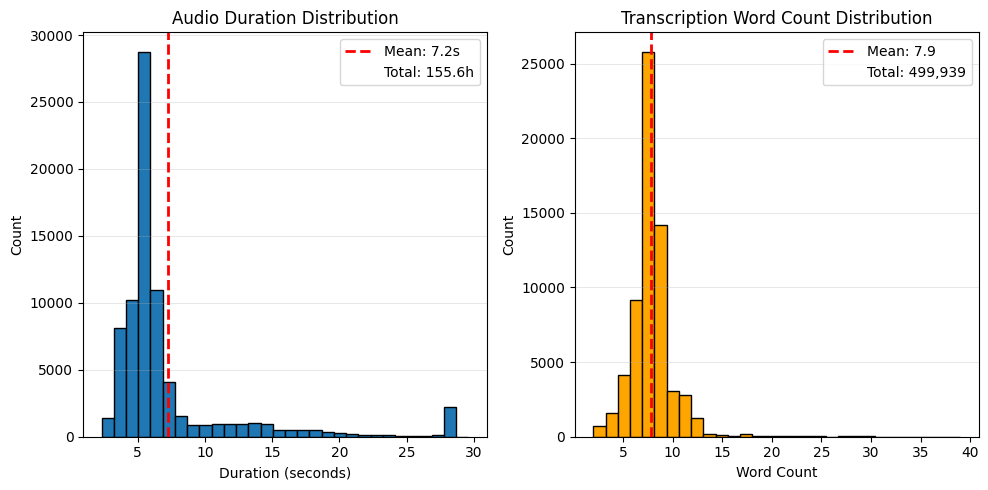

In [56]:
from scripts.dataset_plotting import plot_distribution_graphs

plot_distribution_graphs(combined_case_sensitive_df)